# Apple Stock Price Prediction

This notebook aims to analyze and predict Apple's stock price. The notebook is structured as follows:
1. **Data Collection and Initial Exploration**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Data Preprocessing**
5. **Modeling and Prediction**
6. **Model Evaluation**
7. **Future Predictions**

## 1. Data Collection and Initial Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-10-01  10.219643  10.235000  10.048214  10.090000   8.564354  448142800
2010-10-04  10.057143  10.103571   9.920357   9.951429   8.446738  435302000
2010-10-05  10.071429  10.337500  10.065000  10.319286   8.758977  501967200
2010-10-06  10.342500  10.428214  10.187857  10.328214   8.766550  670868800
2010-10-07  10.369286  10.374286  10.246786  10.329286   8.767464  408399600


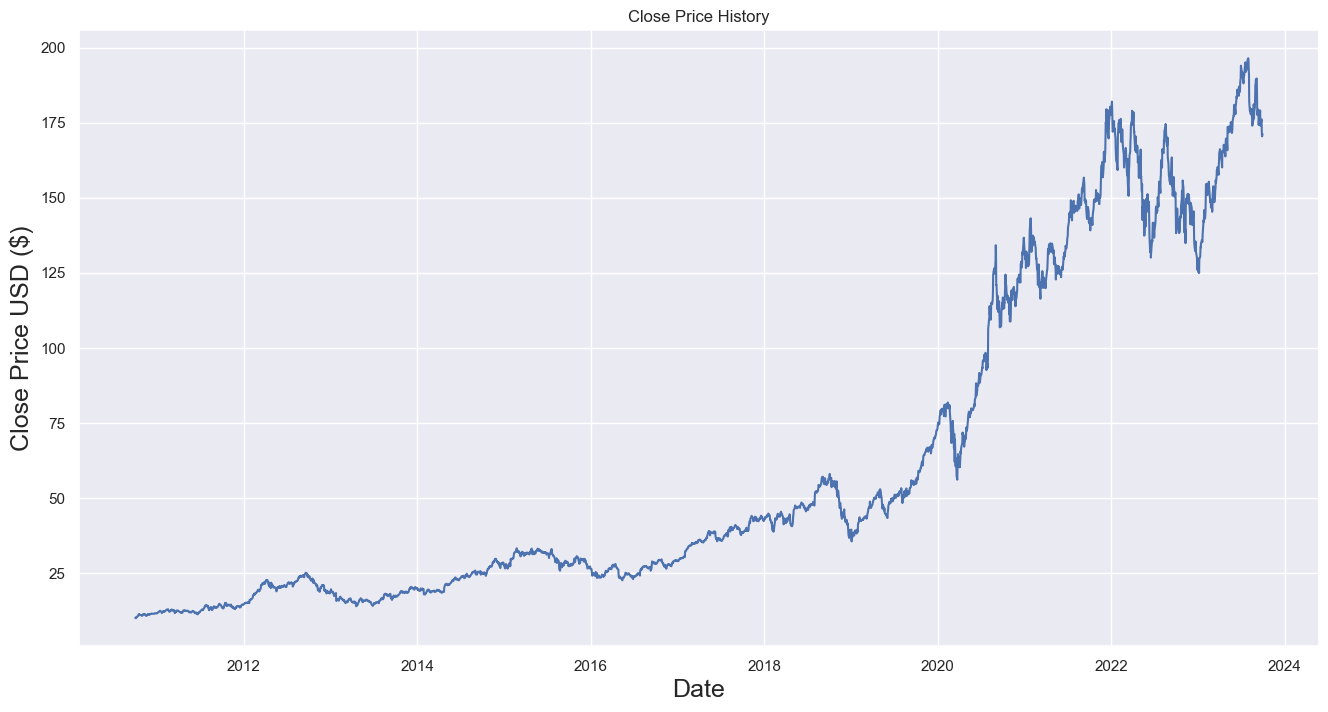

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
symbol = 'AAPL'
start_date = '2010-10-01'  # 10 years prior
end_date = '2023-10-01'

# Fetch Data
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Display the data
print(stock_data.head())

# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stock_data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()


## 2. Exploratory Data Analysis (EDA)

In this section, we will explore the dataset to understand its structure, trends, patterns, and anomalies, if any. This step is crucial to gain insights into the dataset and inform the subsequent steps in the analysis.

,Open,High,Low,Close,Adj Close,Volume
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3.271000e+03
mean,60.433770,61.094546,59.799164,60.471179,58.466106,2.224635e+08
std,53.410447,54.043297,52.819293,53.454254,53.934194,1.944149e+08
min,10.057143,10.103571,9.920357,9.951429,8.446738,3.145820e+07
25%,21.447321,21.671428,21.244108,21.526785,18.423280,9.262260e+07
50%,35.400002,35.595001,35.217499,35.407501,33.138401,1.458196e+08
75%,91.176250,92.407501,90.283749,91.204998,89.424461,2.901486e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.880998e+09


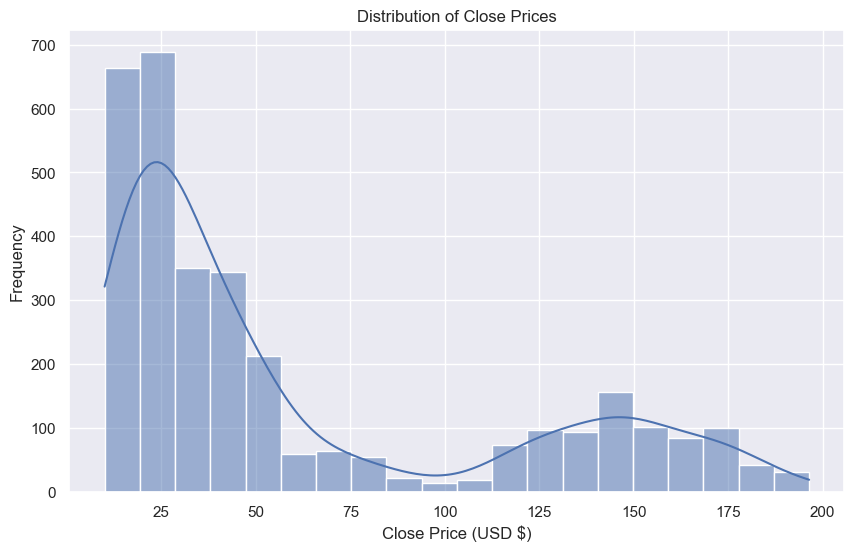

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import seaborn as sns
sns.set()
from IPython.display import display

# Display the summary statistics of the numerical columns
display(stock_data.describe())

# Visualize the distribution of the 'Close' prices
plt.figure(figsize=(10,6))
sns.histplot(stock_data['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price (USD $)')
plt.ylabel('Frequency')
plt.show()


## 3. Feature Engineering

Feature engineering involves creating new features from the original features in the dataset, which might help in improving the model's performance.

In [4]:
import numpy as np
stock_data['MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['MA10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data.dropna(inplace=True)  # Drop rows with NaN values

## 4. Data Preprocessing

In this section, we'll prepare the data for modeling. This involves creating the target variable, splitting the data into training and test sets, and scaling the features.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
# Create a new dataframe with only the 'Close' column
data = stock_data.filter(['Close'])

# Create the features (X) and the target (y)
X = data.values
y = np.roll(X, shift=-252)  # Assuming 252 trading days in a year

# Removing the last year of data from X and y as it doesn't have a corresponding target
X = X[:-252]
y = y[:-252]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data)

## 5. Modeling and Prediction

In this section, we will build various predictive models, train them with the training data, and make predictions on the test data.

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


c:\Users\taula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


c:\Users\taula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\taula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\taula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\taula\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A 

Decision Tree Model Mean Squared Error: 183.47
Decision Tree Model Predictions vs Actual Values:
Date: 2021-05-13 00:00:00, Predicted: $40.83, Actual: $39.29
Date: 2021-05-14 00:00:00, Predicted: $23.43, Actual: $24.67
Date: 2021-05-17 00:00:00, Predicted: $38.97, Actual: $39.21
Date: 2021-05-18 00:00:00, Predicted: $24.99, Actual: $21.77
Date: 2021-05-19 00:00:00, Predicted: $175.08, Actual: $141.51
Date: 2021-05-20 00:00:00, Predicted: $23.84, Actual: $27.17
Date: 2021-05-21 00:00:00, Predicted: $28.08, Actual: $38.75
Date: 2021-05-24 00:00:00, Predicted: $61.94, Actual: $61.72
Date: 2021-05-25 00:00:00, Predicted: $15.99, Actual: $15.36
Date: 2021-05-26 00:00:00, Predicted: $183.31, Actual: $159.22
Date: 2021-05-27 00:00:00, Predicted: $124.40, Actual: $121.10
Date: 2021-05-28 00:00:00, Predicted: $16.25, Actual: $15.05
Date: 2021-06-01 00:00:00, Predicted: $18.79, Actual: $21.69
Date: 2021-06-02 00:00:00, Predicted: $48.51, Actual: $53.33
Date: 2021-06-03 00:00:00, Predicted: $193.

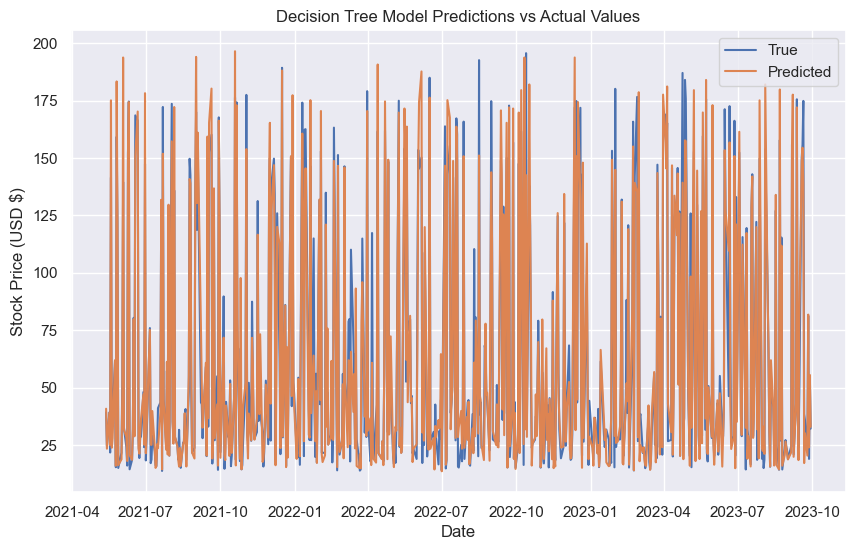

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_model.fit(X_train, y_train)

# Make predictions
tree_predictions = tree_model.predict(X_test)

# Calculate and print mean squared error
mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree Model Mean Squared Error: {mse:.2f}")

# Print predictions vs actual values
print("Decision Tree Model Predictions vs Actual Values:")
for date, pred, actual in zip(stock_data.index[-len(y_test):], tree_predictions, y_test):
    print(f"Date: {date}, Predicted: ${pred:.2f}, Actual: ${actual[0] if isinstance(actual, np.ndarray) else actual:.2f}")

# Plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data.index[-len(y_test):], y_test, label='True')
plt.plot(stock_data.index[-len(y_test):], tree_predictions, label='Predicted')
plt.title('Decision Tree Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD $)')
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = stock_data.drop('Close', axis=1)
y = stock_data[['Close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_absolute_error
# Gradient Boosting
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train.values.ravel())
best_model = grid_search.best_estimator_

# Predictions
gb_predictions = best_model.predict(X_test_scaled)

# Evaluation
print('Gradient Boosting Model Evaluation:')
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, gb_predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gb_predictions)))

# Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='linear'))
nn_model.compile(optimizer='adam', loss='mse')

# Training
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predictions
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluation
print('Neural Network Model Evaluation:')
print('Mean Absolute Error:', mean_absolute_error(y_test, nn_predictions))
print('Mean Squared Error:', mean_squared_error(y_test, nn_predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, nn_predictions)))


Gradient Boosting Model Evaluation:
Mean Absolute Error: 0.20044366417921294
Mean Squared Error: 0.09062194464203323
Root Mean Squared Error: 0.3010347897536649
21/21 [==============================] - 0s 769us/step
Neural Network Model Evaluation:
Mean Absolute Error: 5.804019571998702
Mean Squared Error: 73.12454193876671
Root Mean Squared Error: 8.551288905116392


## 6. Model Evaluation

After building and training the models, it's crucial to evaluate their performance using appropriate evaluation metrics. This helps in understanding the effectiveness of the models and in selecting the best model for making future predictions.

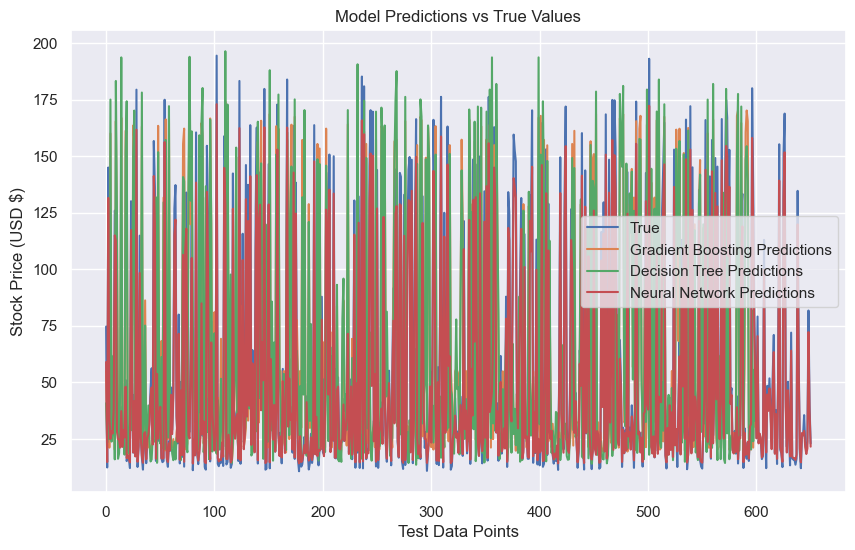

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Visualize the residuals and errors for the models
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='True')
plt.plot(predictions, label='Gradient Boosting Predictions')
plt.plot(tree_predictions, label='Decision Tree Predictions')
plt.plot(nn_predictions, label='Neural Network Predictions')
plt.title('Model Predictions vs True Values')
plt.xlabel('Test Data Points')
plt.ylabel('Stock Price (USD $)')
plt.legend()
plt.show()


## 7. Future Predictions

In this section, we will use the best-performing model to make predictions about future stock prices. It's important to note that stock price predictions are inherently uncertain and should be used with caution.

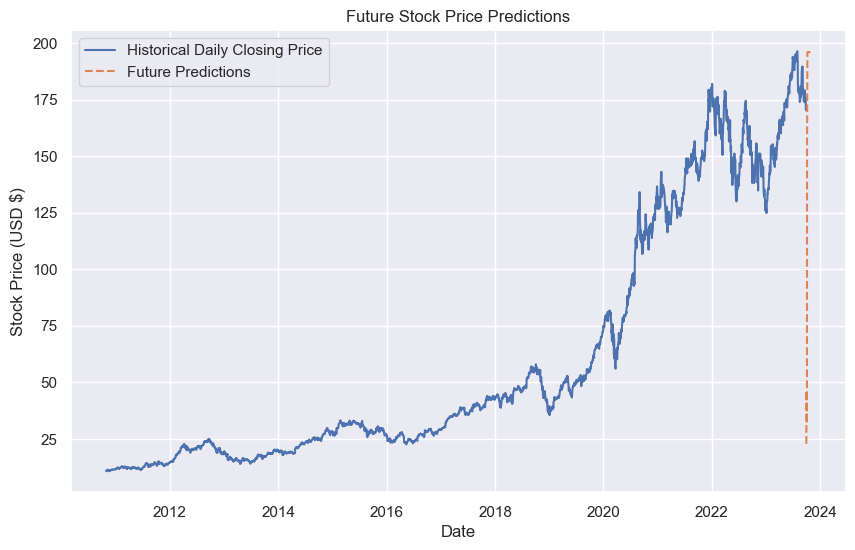

In [14]:

# Assuming the best-performing model is the Gradient Boosting model
# (this should be replaced with the actual best-performing model)
import numpy as np

# Define the number of days to predict
num_days = 30  # for example, predicting the next 30 days

# Initialize the list to hold the future predictions
future_predictions = []

# Use the last 'n' days of data to predict the next day
# Here, 'n' is the number of features the model was trained on
# For each subsequent day, use the predicted day and the 'n-1' previous days to predict the next day, and so on.
input_data = X_test_scaled[-1]  # Taking the last day of test data as starting point
for _ in range(num_days):
    # Make a prediction for the next day
    next_day_prediction = best_model.predict(input_data.reshape(1, -1))[0]
    future_predictions.append(next_day_prediction)
    
    # Update the input_data to include the predicted day and exclude the first day
    # This is a simplified example and assumes that you are using the past 'n' days of closing prices as features
    # You might need to adjust this based on the actual features used for training the model
    input_data = np.roll(input_data, shift=-1)
    input_data[-1] = next_day_prediction

# Visualize the future predictions along with the historical stock prices
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Historical Daily Closing Price')
plt.plot(pd.date_range(start=stock_data.index[-1], periods=num_days + 1)[1:], future_predictions, label='Future Predictions', linestyle='dashed')
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD $)')
plt.legend()
plt.show()
